In [42]:
# Import libraries
import pandas as pd
import numpy as np
import wandb
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn import set_config
import pickle
from pandas_profiling import ProfileReport

In [9]:
# Default Parameters
raw_data = "D:/Work_Projects/sample_pipeline/exp_pipeline/data/raw_data.csv"
cleaned_data = "D:/Work_Projects/sample_pipeline/exp_pipeline/data/cleaned_data.csv"
wandb_API_Key = "80be2a65a225c34aa83cfbeeed1754168159d98d"
data_report = "D:/Work_Projects/sample_pipeline/exp_pipeline/data_profile_report/data_profile_report.html"

In [3]:
raw_df = pd.read_csv(raw_data)
raw_df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [4]:
raw_df.drop(columns=['instr','class','nb.repeat','attendance','difficulty'], inplace=True)
raw_df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,...,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,...,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,...,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


In [14]:
raw_df.to_csv(cleaned_data, index=False)
cleaned_data = pd.read_csv(cleaned_data)
cleaned_data.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [24]:
report = ProfileReport(cleaned_data)
report.to_file(output_file=data_report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

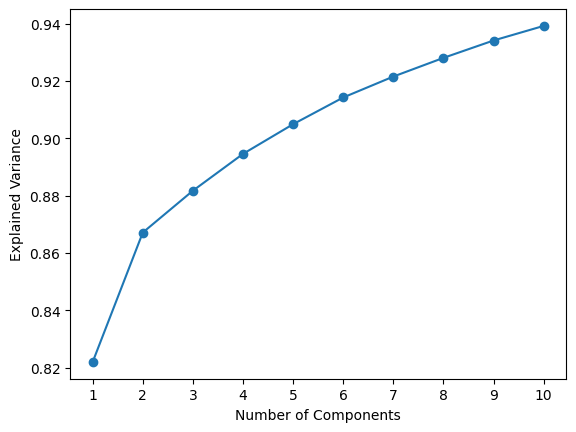

In [73]:
pca = PCA(n_components = 10, random_state=1)
pca_model = pca.fit(cleaned_data)
exp_var = pca.explained_variance_ratio_.cumsum()

xpoints = range(1, len(exp_var)+1)

plt.plot(xpoints, exp_var, 'o-')
plt.xlabel('Number of Components')
plt.xticks(xpoints)
plt.ylabel('Explained Variance')
plt.show()

In [26]:
n_components = 2
wandb.init(project="exp2", entity="aamirshuaib")
wandb.log({"pca_components": n_components})

In [27]:
# reduce to 2 dimensions
pca = PCA(n_components = n_components, random_state=1)
pca_model = pca.fit(cleaned_data)
X = pca_model.transform(cleaned_data)
print('Explained Variance Ratio : ' + str(pca.explained_variance_ratio_.cumsum()[1]))
wandb.log({"Explained Variance Ratio": pca.explained_variance_ratio_.cumsum()[1]})

Explained Variance Ratio : 0.8671381678891066


In [28]:
columns = ['PCA_' + str(i) for i in range(1, n_components + 1)]
pca_df = pd.DataFrame(X, columns=columns)
pca_df.head()

,PCA_1,PCA_2
0,0.989015,0.522798
1,0.989015,0.522798
2,-9.591289,0.640802
3,0.989015,0.522798
4,11.569319,0.404794


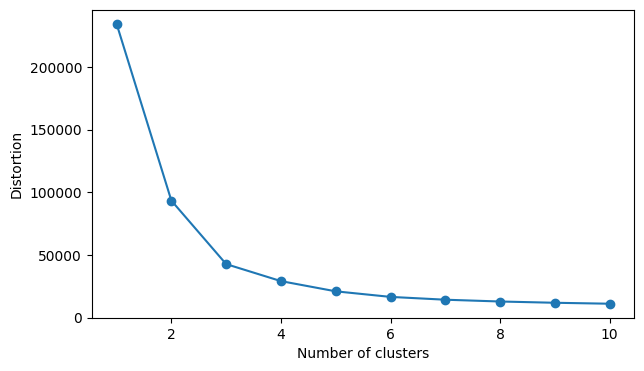

In [75]:
# calculate distortion for a range of number of cluster
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.figure(figsize=(7, 4))
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
#wandb.log({"Elbow": plt})
plt.show()

In [30]:
n_clusters = 6
wandb.log({"n_clusters": n_clusters})

In [31]:
km = KMeans(
    n_clusters=n_clusters, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)


wandb.sklearn.plot_clusterer(km, X, y_km, labels=None, model_name='Kmeans')

wandb: 
wandb: Plotting Kmeans.
wandb: Logged elbow curve.
wandb: WARNING using only the first 1000 datapoints to create chart silhouette
wandb: WARNING using only the first 1000 datapoints to create chart silhouette
wandb: WARNING using only the first 1000 datapoints to create chart silhouette
wandb: WARNING using only the first 1000 datapoints to create chart silhouette
wandb: WARNING using only the first 1000 datapoints to create chart silhouette
wandb: Logged silhouette plot.


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

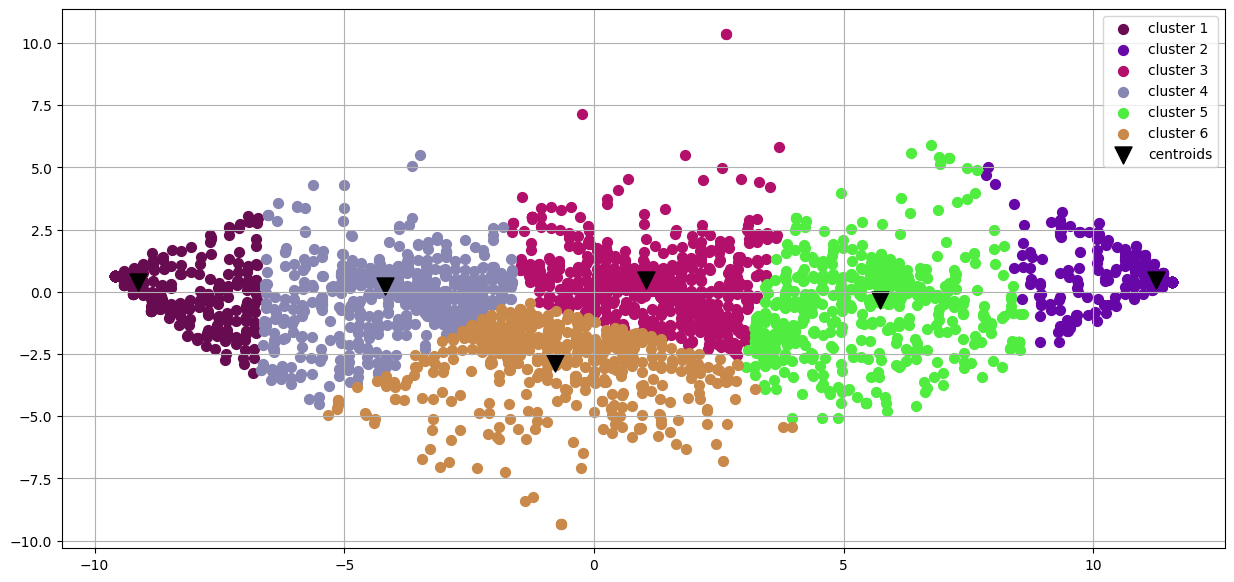

In [35]:
plt.figure(figsize=(15,7))

for i in range(0,n_clusters):
    plt.scatter(X[y_km == i, 0], X[y_km == i, 1], s=50, c=np.random.rand(3),label='cluster %d' % (i + 1))
#plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=150, marker='v',
    c='black', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

In [43]:
silhouette_score(X,y_km)
wandb.log({"silhouette_score": silhouette_score(X,y_km)})
print('Silhouette score: %0.3f' % silhouette_score(X,y_km))

Silhouette score: 0.651


In [32]:
pca_df["cluster"] = y_km
pca_df.head()

,PCA_1,PCA_2,cluster
0,0.989015,0.522798,2
1,0.989015,0.522798,2
2,-9.591289,0.640802,0
3,0.989015,0.522798,2
4,11.569319,0.404794,1


In [44]:
table = wandb.Table(columns=pca_df.columns, data=pca_df)
wandb.log({"table": table})

# Building Pipepline

In [45]:
pca_pipe = Pipeline([("pca", PCA(n_components = n_components, random_state=1)),])
Kmeans_pipe = Pipeline([("Kmeans", KMeans(n_clusters=n_clusters, init='k-means++',))])
pipeline = Pipeline([("PCA",pca_pipe),("Kmeans",Kmeans_pipe)])

In [46]:
model = pipeline.fit(cleaned_data)

In [48]:
preprocessed_data = pipeline["PCA"].transform(cleaned_data)

predicted_labels = pipeline["Kmeans"]["Kmeans"].labels_

silhouette_score(preprocessed_data, predicted_labels)

0.6516372163805993

In [49]:
set_config(display='diagram')
model

Pipeline(steps=[('PCA',
                 Pipeline(steps=[('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('Kmeans', Pipeline(steps=[('Kmeans', KMeans(n_clusters=6))]))])

In [50]:
model_registry = "D:/Work_Projects/sample_pipeline/exp_pipeline/model_registry/cluster_model_"+str(n_components)+"_"+str(n_clusters)+"_"+datetime.now().strftime("%m_%d_%Y_%H_%M_%S")+".pkl"
pickle.dump(model, open(model_registry, 'wb'))

In [51]:
artifact = wandb.Artifact('pipeline', type='model')
artifact.add_file(model_registry)
wandb.log_artifact(artifact)

In [52]:
wandb.save()
wandb.finish()

wandb: WARNING Calling wandb.run.save without any arguments is deprecated.Changes to attributes are automatically persisted.


Explained Variance Ratio,▁
n_clusters,▁
pca_components,▁
silhouette_score,▁▁
Explained Variance Ratio,0.86714
n_clusters,6
pca_components,2
silhouette_score,0.65122


# Finalizing the Model

In [53]:
best_model = 'D:/Work_Projects/sample_pipeline/exp_pipeline/model_registry/cluster_model_2_6_05_26_2022_09_07_16.pkl'
final_model = "D:/Work_Projects/sample_pipeline/exp_pipeline/Finalized_model/model.pkl"

In [54]:
model = pickle.load(open(best_model, 'rb'))
pickle.dump(model, open(final_model, 'wb'))

In [56]:
set_config(display='diagram')
model

Pipeline(steps=[('PCA',
                 Pipeline(steps=[('pca',
                                  PCA(n_components=2, random_state=1))])),
                ('Kmeans', Pipeline(steps=[('Kmeans', KMeans(n_clusters=6))]))])